In [12]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def show_render(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

env = gym.make('FrozenLake-v1', desc=None, map_name='4x4', is_slippery=True, render_mode='rgb_array')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [13]:
print(env.observation_space.n)

16


In [14]:
print(env.action_space.n)

4


In [15]:
# calculating the value function for the current policy
def compute_value_function(env, policy, gamma=1.0):
    value_table = np.zeros(env.observation_space.n)
    threshold = 1e-20
    no_of_iterations = 100000

    for i in range(no_of_iterations):
        updated_value_table = np.copy(value_table)

        # computing the value table after each action according to the policy
        for state in range(env.observation_space.n):
            action = policy[state]

            value_table[state] = sum([trans_prob * (reward_prob + gamma*updated_value_table[next_state]) for trans_prob, next_state, reward_prob, _ in env.P[state][action]])

        if (np.sum((np.fabs(updated_value_table - value_table))) <= threshold):
             break
    return value_table

In [16]:
# defining the new policy according to the new value function
def extract_policy(value_table, gamma = 1.0):
    # initialize the policy with zeros
    policy = np.zeros(env.observation_space.n)

    for state in range(env.observation_space.n):
        # initialize the Q table for a state
        Q_table = np.zeros(env.action_space.n)

        # compute Q value for all ations in the state
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]:
                trans_prob, next_state, reward_prob, _ = next_sr
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))

        # select the action which has maximum Q value as an optimal action of the state
        policy[state] = np.argmax(Q_table)

    return policy

In [19]:
# finding the optimal policy
def policy_iteration(env, gamma=1.0):
    old_policy = np.zeros(env.observation_space.n)
    no_of_iterations = 100

    for i in range(no_of_iterations):
        new_value_function = compute_value_function(env, old_policy, gamma)
        new_policy = extract_policy(new_value_function, gamma)

        if np.all(old_policy == new_policy):
            print('Policy-Iteration converged at step %d.' % (i+1))
            break

        old_policy = new_policy
    return old_policy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
env.reset()
optimal_policy = policy_iteration(env)
print(optimal_policy)

Policy-Iteration converged at step 7.
[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0


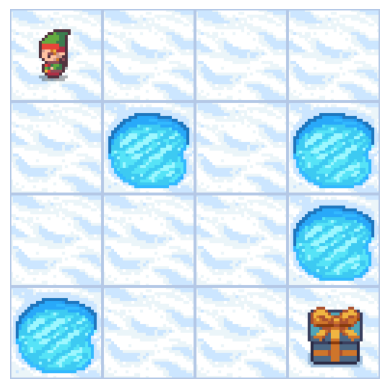

0


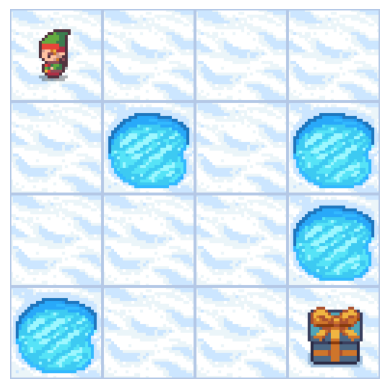

0


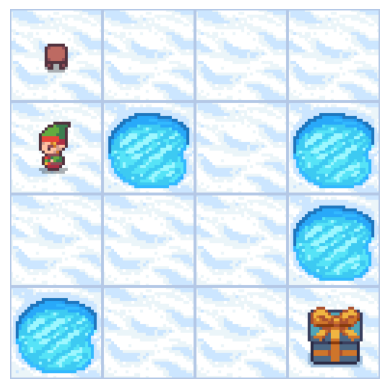

0


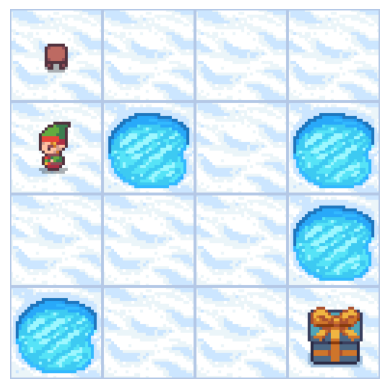

0


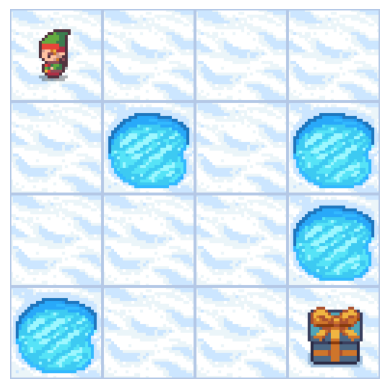

0


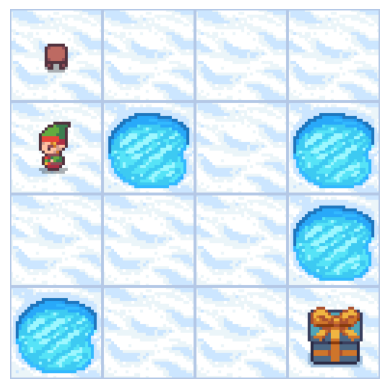

0


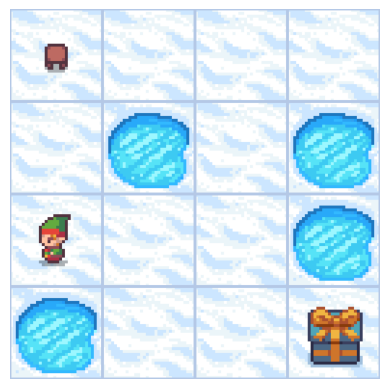

3


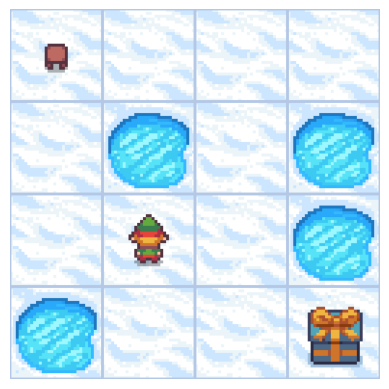

1


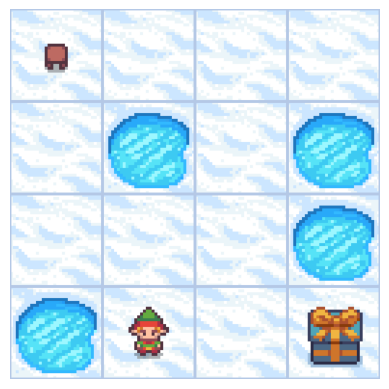

2


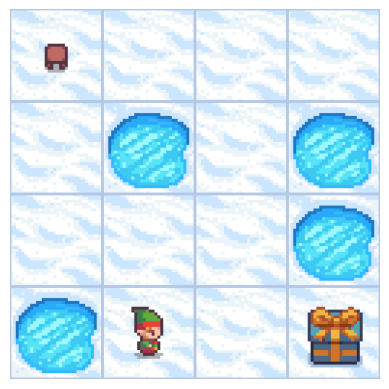

2


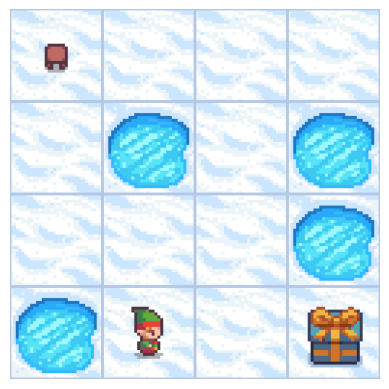

2


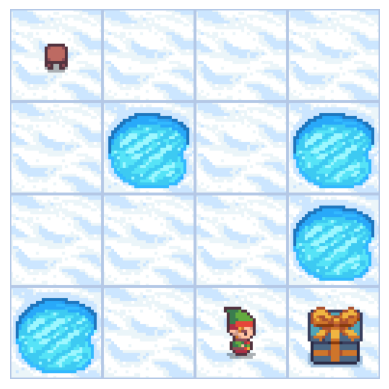

1


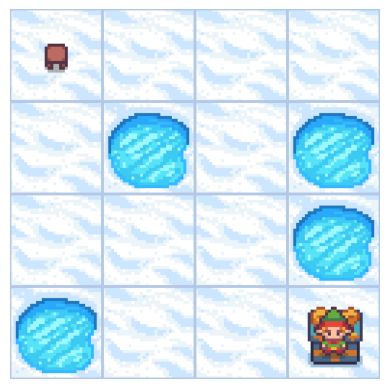

Number of steps done: 12
Success!


In [22]:
# Visualisation
state = env.reset()
env.render()

for t in range(100):
    action = int(optimal_policy[state])
    state, reward, done, info = env.step(action)
    print(action)
    show_render(env.render()[0])
    if done:
        print(f"Number of steps done: {t}")
        break

if reward == 1:
    print("Success!")
else:
    print("Fell into a hole!")

In [23]:
# Calcolate the success rate of the optimal policy
episodes = 200
nb_success = 0

# Evaluation
for _ in range(episodes):
    state = env.reset()
    done = False

    # Until the agent gets stuck or reaches the goal
    while not done:
        # Choose the action based on the optimal policy
        action = int(optimal_policy[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = env.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        if done and reward == 1:
            nb_success += 1

# Let's check our success rate
print(f"Success rate = {nb_success/episodes*100}%")

Success rate = 77.5%


Success!


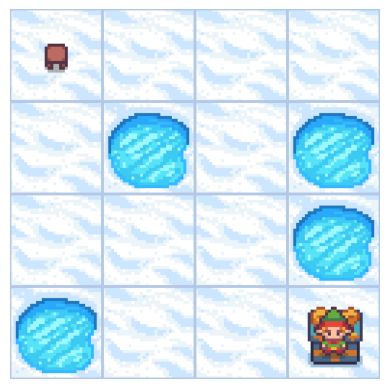

In [24]:
# Animated visualisation
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
frames = []

# Test the optimal policy and collect frames
step_count = 0
state = env.reset()
frames.append(env.render()[0])
done = False

while not done and step_count < 100:
    action = int(optimal_policy[state])
    state, reward, done, info = env.step(action)
    frames.append(env.render()[0])
    step_count += 1

    # Debugging information
    # print(f"Step {step_count}: State={state}, Action={action}, Reward={reward}, Done={done}")

if reward == 1:
    print("Success!")
else:
    print("Fell into a hole or did not reach the goal within step limit.")

# Create the animation
fig, ax = plt.subplots()
plt.axis('off')
im = ax.imshow(frames[0])

def update(frame):
    im.set_array(frame)
    return [im]

anim = FuncAnimation(fig, update, frames=frames, blit=True)

HTML(anim.to_jshtml())

## Conclusions
The task implemented the policy iteration approach to determine the optimal policy for managing an agent in the Frozen Lake environment. Unlike the value iteration approach, which iteratively updates the value function based on the maximum action value, the policy iteration approach involves two steps: policy evaluation and policy improvement. The algorithm first evaluates the value function for a random policy and then improves it based on the updated value function. The result—an optimal policy—matches the result obtained using the value iteration approach, as implemented in the lecture notes.

The agent's behavior under the optimal policy was visualized. Since the environment has an element of randomness (is_slippery=True), the agent does not always reach the goal. The success rate of the agent reaching the goal was calculated. An animation of the agent's behavior was created, changing with each subsequent run. The maximum number of steps for the agent was set to 100; if the goal is not reached within the given number of steps, the attempt is considered unsuccessful.